In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import gym
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, InputLayer
import tensorflow as tf
from keras.backend import tensorflow_backend as K

Episode 1 of 1000


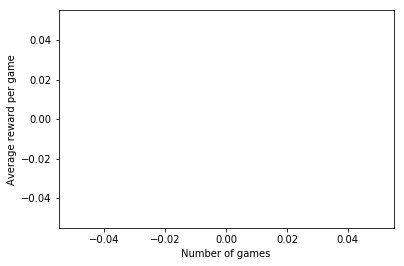

Episode 101 of 1000


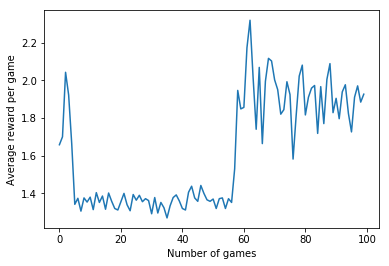

Episode 201 of 1000


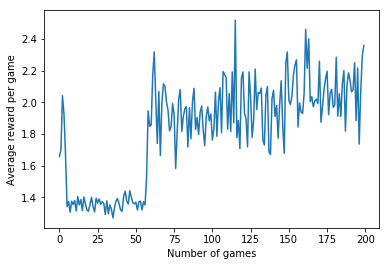

Episode 301 of 1000


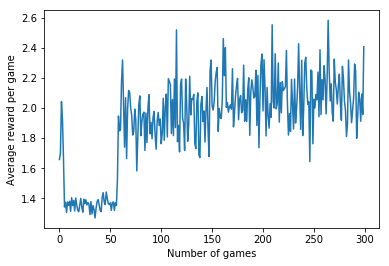

Episode 401 of 1000


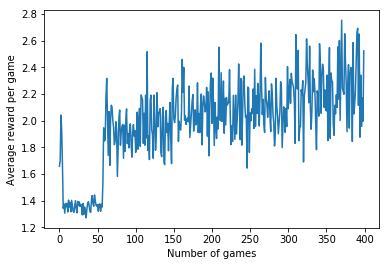

Episode 501 of 1000


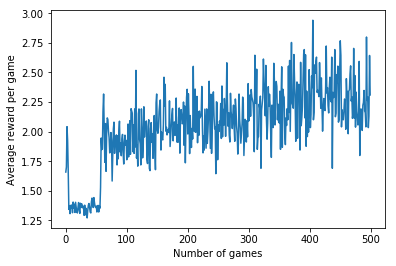

Episode 601 of 1000


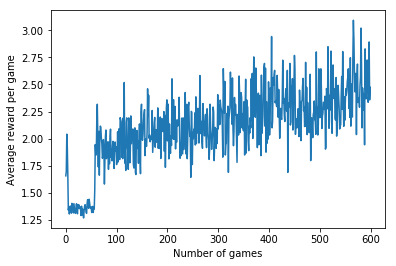

Episode 701 of 1000


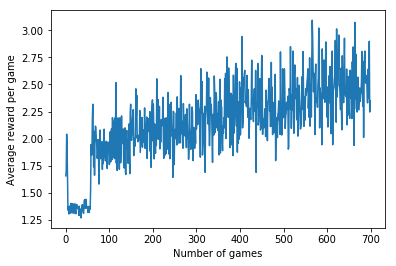

Episode 801 of 1000


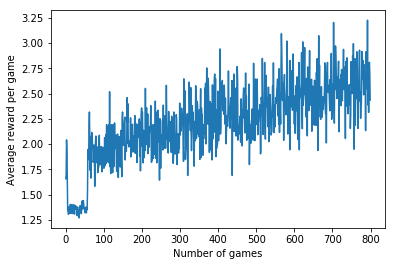

Episode 901 of 1000


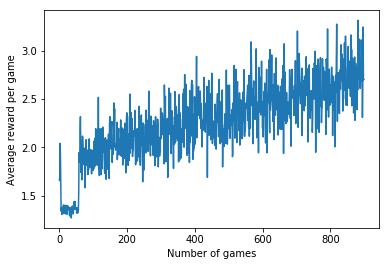

State 0 - action [[60.765022 59.314217]]
State 1 - action [[64.14139  60.227676]]
State 2 - action [[68.59726  61.381653]]
State 3 - action [[74.21297  62.524216]]
State 4 - action [[82.597046 64.21595 ]]


In [6]:
with tf.Session(config=tf.ConfigProto(intra_op_parallelism_threads=4, inter_op_parallelism_threads=1, allow_soft_placement=True, device_count = {'CPU' : 4})) as sess:
    K.set_session(sess)





    env = gym.make('NChain-v0')

    def q_learning_keras(env, num_episodes=1000):
    # create the keras model
        model = Sequential()
        model.add(InputLayer(batch_input_shape=(1, 5)))
        model.add(Dense(10, activation='sigmoid'))
        model.add(Dense(2, activation='linear'))
        model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    # now execute the q learning
        y = 0.95
        eps = 0.5
        decay_factor = 0.999
        r_avg_list = []
        for i in range(num_episodes):
            s = env.reset()
            eps *= decay_factor
            if i % 100 == 0:
                print("Episode {} of {}".format(i + 1, num_episodes))
                plt.plot(r_avg_list)
                plt.ylabel('Average reward per game')
                plt.xlabel('Number of games')
                plt.show()
            done = False
            r_sum = 0
            while not done:
                if np.random.random() < eps:
                    a = np.random.randint(0, 2)
                else:
                    a = np.argmax(model.predict(np.identity(5)[s:s + 1]))
                new_s, r, done, _ = env.step(a)
                target = r + y * np.max(model.predict(np.identity(5)[new_s:new_s + 1]))
                target_vec = model.predict(np.identity(5)[s:s + 1])[0]
                target_vec[a] = target
                model.fit(np.identity(5)[s:s + 1], target_vec.reshape(-1, 2), epochs=1, verbose=0)
                s = new_s
                r_sum += r
            r_avg_list.append(r_sum / 1000)
        #plt.plot(r_avg_list)
        #plt.ylabel('Average reward per game')
        #plt.xlabel('Number of games')
        #plt.show()
        for i in range(5):
            print("State {} - action {}".format(i, model.predict(np.identity(5)[i:i + 1])))

    if __name__ == "__main__":
        q_learning_keras(env, 1000)